# Exercise Sheet 5b: Supervised Learning

### Importing Libraries

a) Create a new notebook and start by importing the needed libraries.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/giovanaandrade/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


b) Read the data from the CSV file and check the data using the head(), describe(), and other Pandas commands. 

In [2]:
iris_data_new = pd.read_csv('iris-data-new2.csv')
iris_data_new.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,iris_type,package,price
0,5.1,3.5,1.4,0.2,Iris-setosa,2,Medium
1,4.9,3.0,1.4,0.2,Iris-setosa,1,Low
2,4.7,3.2,1.3,0.2,Iris-setosa,0,Low
3,4.6,3.1,1.5,0.2,Iris-setosa,0,Low
4,5.0,3.6,1.4,0.2,Iris-setosa,0,Low


In [3]:
iris_data_new.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,package
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732,0.442953
std,0.799542,0.430104,1.758720,0.762191,0.710753
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
iris_data_new.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
iris_type           object
package              int64
price               object
dtype: object

c) Using only the attribute sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm, fit a simple decision tree model to the data, using holdout, with 75% for training.

In [5]:
all_inputs = iris_data_new[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values
all_labels = iris_data_new['iris_type'].values
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

d) Analyze the accuracy, precision, recall and f-measure achieved.

In [7]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

In [8]:
from sklearn.metrics import classification_report
predictions = decision_tree_classifier.predict(testing_inputs)
print(classification_report(testing_classes, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



Analysis:

- The decision tree classifier is able to predict the iris-setosa type with precision and recall of 1.0.

- The types iris-versicolor and iris-virginica are not predicted perfectly, although the precision and recall are still very good, with an overall f1-score of 0.97 and 0.95, respectively.

e) Create and analyze a confusion matrix of the results. 

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

dct1 = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5, 6],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(dct1, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9866666666666667
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 4, 'splitter': 'random'}


In [10]:
dct1 = grid_search.best_estimator_
print(dct1.score(all_inputs, all_labels))

0.9664429530201343


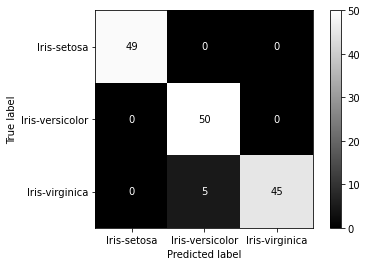

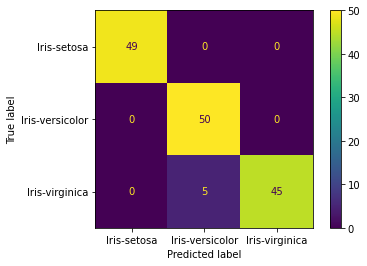

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = dct1.predict(all_inputs)
cm = confusion_matrix(all_labels, pred, labels=dct1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dct1.classes_)
disp.plot(cmap="gist_gray")
disp.plot()

f) Using only the attribute sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm, fit a simple nearest neighbor model to the data using holdout with 75% for training.

In [12]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(training_inputs, training_classes)

KNeighborsClassifier(n_neighbors=1)

g) Analyze the accuracy, precision, recall and f-measure achieved and the confusion matrix

In [14]:
knn_classifier.score(testing_inputs, testing_classes)

/Users/giovanaandrade/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9736842105263158

In [15]:
from sklearn.metrics import classification_report
predictions = knn_classifier.predict(testing_inputs)
print(classification_report(testing_classes, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



/Users/giovanaandrade/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

knnc = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [1, 2, 3, 4, 5],
                  'leaf_size': [5, 10, 15, 30, 60],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] }

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(knnc, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('=======================================================================')
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
print('=======================================================================')

/Users/giovanaandrade/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/giovanaandrade/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

Best score: 0.9666666666666668
Best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 5}


/Users/giovanaandrade/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/giovanaandrade/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

In [17]:
knnc = grid_search.best_estimator_
print(knnc.score(all_inputs, all_labels))

0.9664429530201343


/Users/giovanaandrade/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/Users/giovanaandrade/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


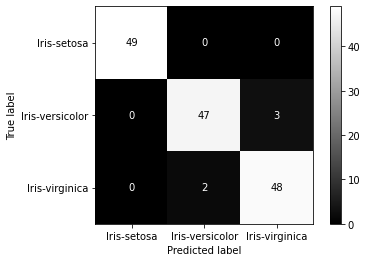

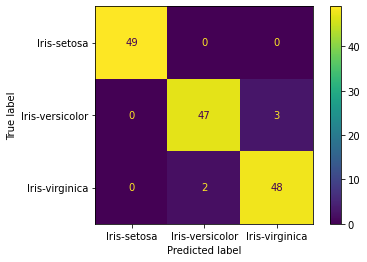

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = knnc.predict(all_inputs)
cm = confusion_matrix(all_labels, pred, labels=knnc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knnc.classes_)
disp.plot(cmap="gist_gray")
disp.plot()

h) Use two different methods for balancing the dataset and repeat the previous analyses.

i) Using all the attributes available, and the balanced dataset, fit distinct models such as Nearest Neighbor, Decision Trees, SVMs and Neural Networks to the data and try different configuration parameters, using holdout with 75% for training.

In [19]:
from sklearn.model_selection import cross_val_score

# SVC
from sklearn.svm import SVC
svm = SVC(kernel='poly', gamma='auto')
scores = cross_val_score(svm, all_inputs, all_labels, cv=10)
print("SVC: ", scores.mean())

# NB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
scores = cross_val_score(nb, all_inputs, all_labels, cv=10)
print("NB: ", scores.mean())

# KNN
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, all_inputs, all_labels, cv=10)
print("KNN: ", scores.mean())

# MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(25), random_state=1)
scores = cross_val_score(mlp, all_inputs, all_labels, cv=10)
print("MLP: ", scores.mean())


SVC:  0.9733333333333334
NB:  0.9533333333333334
KNN:  0.96


/Users/giovanaandrade/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/giovanaandrade/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

MLP:  0.9800000000000001


j) Analyze the accuracy, precision, recall and f-measure achieved and the confusion matrix

k) Repeat the previous analysis but experimenting with all models using 5-fold CrossValidation.

l) Use Grid Search to define the best parameters for the best two algorithms.

m) Analyze the accuracy, precision, recall, f-measure and the confusion matrix for the best model.